# Práctica 5 - ML
## Bike Rentals
En esta práctica, vamos a aplicar distintos estimadores de regresión como de clasificación, a un conjunto de datos sobre alquiler de bicicletas. Donde se quiere estimar el número de bicicletas que se alquilarán dependiendo de factores climáticos (temperatura, humedad,...) y de la tipología del día (festivo, día de la semana,...).

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carga de datos en un DataFrame

In [2]:
df = pd.read_csv('bike_rentals.csv')

Visualizamos los datos cargados.

In [3]:
df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,1796


Los datos parecen apropiados, a excepción de la columna `instant` que puede ser descartada al ser similar al índice del DataFrame y no nos aporta información relevante.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    float64
 2   yr          731 non-null    float64
 3   mnth        731 non-null    float64
 4   holiday     731 non-null    float64
 5   weekday     731 non-null    float64
 6   workingday  731 non-null    float64
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  cnt         731 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 74.4 KB


Vemos que los datos son númericos y que no contienen nulos.

Estudiemos la columna `cnt` que será nuestra columna a predecir.

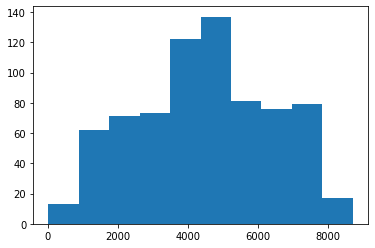

In [5]:
plt.hist(df['cnt'])
plt.show()

Los datos de `cnt` tienen una forma normal, por lo que se aconseja que a la hora de realizar la separación de datos de entrenamiento y test, se añada el hiperparámetro `stratify` para compensar los valores extremos de la normal.<br>
Para poder aplicar la estratificación, crearemos una nueva columna `cnt_cod` que contendrá los valores del millar al que pertenecen, por lo que la columna `cnt` la dividiremos por mil y nos quedaremos con la parte entera.

In [6]:
df['cnt_cod'] = np.trunc(df['cnt'] / 1000).astype('int64')
df['cnt_cod']

0      0
1      0
2      1
3      1
4      1
      ..
726    2
727    3
728    1
729    1
730    2
Name: cnt_cod, Length: 731, dtype: int64

## Datos de Entrenamiento y Test

Tomamos como `X` todos los datos excepto `instant`, `cnt` y `cnt_cod`.<br>
Para la `y` tomamos la columna `cnt`.<br>
Para los datos de clasificación, creamos la `y_cod` con la columna `cnt_cod`

In [7]:
X = df.drop(['instant','cnt','cnt_cod'], axis=1)
y = df['cnt']
y_cod = df['cnt_cod']

Entrenamos los datos, separando un 70% de datos para entrenamiento y un 30% para test.<br>
También aplicamos la estratificación a la columna `y_cod`, como indicamos anteriormente.<br>
Aprovechamos la ejecución del entrenamiento, para obtener las `y` tanto para regresión como clasificación, y que estas tengan las mismas `X` durante todas las pruebas.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_train_clf, y_test_clf = train_test_split (X, y, y_cod,
                                                                            train_size=0.7, 
                                                                            shuffle=True,
                                                                            stratify=y_cod)

## Regresión

### Linear Regresion

Aplicamos el estimador.

In [9]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print('Entrenamiento:', modelo.score(X_train, y_train)) #score de entrenamiento
print('Test', modelo.score(X_test, y_test))  #score de generalizacion

Entrenamiento: 0.7938092959822094
Test 0.8085654813163714


Vemos que da unos buenos valores de entrenamiento y test.

Apliquemos `Cross Validate` para todo el conjunto de datos.

In [10]:
from sklearn.model_selection import cross_validate

cv = cross_validate(LinearRegression(),
                X, y,
                cv=None,
                return_train_score=True)

print('Entrenamiento:', np.mean(cv['train_score']))
print('Test', np.mean(cv['test_score']))

Entrenamiento: 0.7943183752711179
Test 0.14698268997300484


Vemos que nos da unos valores muy bajos en Test.<br>
Se ha comprobado con ejecuciones externas, que no se recogen en este documento, que cuando los datos de entrada para la `y` no se encuentran estratificados o, simplemente, no se barajan los datos, estos tienen una ordenación que por defecto hacen que el modelo generado no sea bueno.

Con estas consideraciones, vamos a aplicar con `KFold` que los datos se barajen cuando se apliquen a todo el DataFrame.

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

skf = KFold(n_splits=5,shuffle=True)

cv = cross_validate(LinearRegression(),
                X, y,
                cv=skf,
                return_train_score=True)

print('Entrenamiento:', np.mean(cv['train_score']))
print('Test', np.mean(cv['test_score']))

Entrenamiento: 0.8014906829631914
Test 0.7846470580865385


Ahora si tendemos a unos datos similares a los que obtuvimos en primera instancia con este estimador, teniendo valores de entrenamiento y test muy similares, entorno al 80%.

### Regresión Polinómica

Aplicamos el estimador de regresión polinómica para grado 2.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
X_train_pol = pf.fit_transform(X_train)  # Procesamos los datos de train
modelo = LinearRegression()
modelo.fit(X_train_pol, y_train)

print('Entrenamiento:', modelo.score(X_train_pol, y_train)) 
X_test_pol = pf.fit_transform(X_test)   # Procesamos los datos de test
print('Test', modelo.score(X_test_pol, y_test)) 

Entrenamiento: 0.8998717396586446
Test 0.8768031317779971


Parece que también nos da una buena estimación, con unos valores de entrenamiento y test, no muy dispares.

Realicemos `Cross Validate` a este estimador. También le aplicaremos el barajado de los datos.

In [13]:
skf = KFold(n_splits=5,shuffle=True)

pf = PolynomialFeatures(degree=2)
X_pol = pf.fit_transform(X)
cv = cross_validate(LinearRegression(),
                X_pol, y,
                cv=skf,
                return_train_score=True)

print('Entrenamiento:', np.mean(cv['train_score']))
print('Test', np.mean(cv['test_score']))

Entrenamiento: 0.8210058871734113
Test 0.7145856701741276


Así, ya la salida que nos ofrece, no son tan parejos los valores, bajando el test. Por lo que no es tan bueno este estimador como el de regresión linear.

Apliquemos ahora el estimador polinómico con grado 4.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=4)
X_train_pol = pf.fit_transform(X_train)
modelo = LinearRegression()
modelo.fit(X_train_pol, y_train)

print('Entrenamiento:', modelo.score(X_train_pol, y_train)) 
X_test_pol = pf.fit_transform(X_test)
print('Test', modelo.score(X_test_pol, y_test)) 

Entrenamiento: 1.0
Test -574.9740626018142


Vemos que al subir de grado, tenemos sobre entrenamiento, por lo que no mejoraremos subiendo de grado.

### SVR

Aplicamos el estimador SVR.

In [15]:
from sklearn.svm import SVR

modelo = SVR(C=1,gamma=1)
modelo.fit(X_train, y_train)

print('Entrenamiento:', modelo.score(X_train, y_train))
print('Test', modelo.score(X_test, y_test))

Entrenamiento: 0.002987728888589558
Test 0.002540133023248181


Obtenemos unos valores muy bajos, entorno a cero.<br>
Veamos que ocurre si aplicamos `Cross Validate`.

In [16]:
skf = KFold(n_splits=5,shuffle=True)

model = SVR()
cv = cross_validate(model,
                X_train, y_train,
                cv=skf,
                return_train_score=True)

print('Entrenamiento:', np.mean(cv['train_score']))
print('Test', np.mean(cv['test_score']))

Entrenamiento: 0.010721263321363406
Test -0.016615642870486225


Los valores son similares a los recogidos en primera instancia, quedan entorno a cero.

Como SVR tiene hiperparámetros de entrada que pueden ser modificados para ajustarse a los datos que tenemos y que queremos predecir, vamos a aplicarle `Grid Search`. Ya que con esta técnica si que podremos ir probando para distintos hiperparámetros del estimador.

Los hiperparámetros a probar serán: `C` con valores de 1 a 39, y `gamma` con 4 posibles valores.

In [17]:
from sklearn.model_selection import GridSearchCV

model = SVR()
param_grid = {
    'C': range(1, 40),
    'gamma': [0.001, 0.01, 0.1, 1]
    }
gs = GridSearchCV(model, param_grid, cv=5)
gs.fit(X_train,y_train)

print('Best score:', gs.best_score_)
print('Mejores parámetros:', gs.best_estimator_)
print('Entrenamiento:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Best score: 0.2815441349327708
Mejores parámetros: SVR(C=39, gamma=0.1)
Entrenamiento: 0.35114195251047786
Test: 0.37420507626017774


Con estos cambios, tanto el entrenamiento como el test comienzan a funcionar mejor que con los valores por defecto de `SVR`.<br>
Vemos que para los mejores parámetros, el valor de `C` está en el límite superior que hemos escogido, por lo que vamos a ejecutarlo de nuevo, pero cambiando el rango a verificar de 40 a 79.

In [18]:
model = SVR()
param_grid = {
    'C': range(40, 80),
    'gamma': [0.001, 0.01, 0.1, 1]
}
gs = GridSearchCV(model, param_grid, cv=5)
gs.fit(X_train,y_train)

print('Best score:', gs.best_score_)
print('Mejores parámetros:', gs.best_estimator_)
print('Entrenamiento:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Best score: 0.4208506745440295
Mejores parámetros: SVR(C=79, gamma=0.1)
Entrenamiento: 0.5004824111757222
Test: 0.5302464439525674


Subimos hasta un 50%, por lo que estos cambios en los hiperparámetros están surtiendo efecto.

Tras varios lanzamientos, se ve que un valor alto de `C` influye mucho en la estimación, por lo que se pone un listado con valores altísimos para verificar, esta teoría.

In [19]:
model = SVR()
param_grid = {
    'C': [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000],
    'gamma': [0.00001, 0.0001, 0.001, 0.01]
}
gs = GridSearchCV(model, param_grid, cv=5)
gs.fit(X_train,y_train)

print('Best score:', gs.best_score_)
print('Mejores parámetros:', gs.best_estimator_)
print('Entrenamiento:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Best score: 0.8057367884942913
Mejores parámetros: SVR(C=80000, gamma=0.01)
Entrenamiento: 0.8382512578087058
Test: 0.8593681049331086


Como podemos observar, con grandes valores de `C`, obtenemos unos resultados que llegan al 80%, como con la regresión lineal.

### LinearSVR

Apliquemos el estimador `LinearSVR`.

In [20]:
from sklearn.svm import LinearSVR

model = LinearSVR(C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

print('Entrenamiento:', modelo.score(X_train, y_train))
print('Test', modelo.score(X_test, y_test)) 

Entrenamiento: 0.002987728888589558
Test 0.002540133023248181


Nos da valores en el cero.<br>
Al igual que con `SVR`, este estimador tiene hiperparámetros que pueden modificarse, por lo que también le aplicaremos `Grid Search`, y puesto que el anterior funcionaba bien con valores de `C` altos, aquí también los pondremos elevados.

In [21]:
model = LinearSVR()
param_grid = {
    'C': [100, 200, 300, 400, 500, 600, 700, 800],
    'epsilon': [0.00001, 0.0001, 0.001, 0.01],
    'max_iter': [100000]
}
gs = GridSearchCV(model, param_grid, cv=5)
gs.fit(X_train,y_train)

print('Best score:', gs.best_score_)
print('Mejores parámetros:', gs.best_estimator_)
print('Entrenamiento:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Best score: 0.7806340266129371
Mejores parámetros: LinearSVR(C=800, epsilon=0.0001, max_iter=100000)
Entrenamiento: 0.7893360714541354
Test: 0.8183345684253052


Vemos que también funciona bien el estimador, con el *tunning* apropiado, dando valores similares a regresión lineal como SVR.

## Clasificación

### SVC

Apliquemos el estimador `SVC` de clasificación.

In [22]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma='scale')
clf.fit(X_train, y_train_clf)

print('Entrenamiento:', clf.score(X_train, y_train_clf))
print('Test:', clf.score(X_test, y_test_clf))

Entrenamiento: 0.4227005870841487
Test: 0.43636363636363634


Con este estimador no llegamos al 50% de acierto.

Veamos si aplicando `Grid Search` podemos mejorar, con la modificación de sus hiperparámetros.

In [23]:
model = SVC()
param_grid = {
    'C': [1, 2, 3, 100, 200, 300],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}
gs = GridSearchCV(model, param_grid, cv=5)
gs.fit(X_train,y_train_clf)

print('Best score:', gs.best_score_)
print('Mejores parámetros:', gs.best_estimator_)
print('Entrenamiento:', gs.score(X_train, y_train_clf))
print('Test:', gs.score(X_test, y_test_clf))

Best score: 0.495183704549781
Mejores parámetros: SVC(C=100, gamma=0.01)
Entrenamiento: 0.6379647749510763
Test: 0.5590909090909091


Así, ya tenemos al menos una aproximación al 50% de acierto, que no es mejor que los estimadores de regresión, pero si que mejora los resultados iniciales de este estimador.

### Árbol de decisión

Apliquemos el estimador del árbol de decisión.

In [24]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(
    criterion='entropy'
    )

arbol.fit(X_train,y_train_clf)

print('Entrenamiento:', arbol.score(X_train, y_train_clf))
print('Test:', arbol.score(X_test, y_test_clf))

Entrenamiento: 1.0
Test: 0.5181818181818182


Vemos que por defecto, nos está dando un sobreentranamiento de los datos.<br>
Apliquemos `Grid Search`.

In [25]:
model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [None, 5, 10, 50, 100],
    'min_samples_split': [2, 4, 6, 8, 10]
}
gs = GridSearchCV(model, param_grid, cv=5)
gs.fit(X_train,y_train_clf)

print('Best score:', gs.best_score_)
print('Mejores parámetros:', gs.best_estimator_)
print('Entrenamiento:', gs.score(X_train, y_train_clf))
print('Test:', gs.score(X_test, y_test_clf))

Best score: 0.5107367218732154
Mejores parámetros: DecisionTreeClassifier(max_depth=10)
Entrenamiento: 0.8864970645792564
Test: 0.5045454545454545


Los resultados de entrenamiento y test siguen siendo dispares, teniendo un alto entrenamiento y un acierto en el test del 50%, por lo que, aunque con modificación de hiperparámetros, se sigue produciendo sobreentrenamiento.

### Regresión Logística

Apliquemos el estimador de regresión logística.

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train_clf)

print("Entrnamiento:", model.score(X_train, y_train_clf))
print("Test:", model.score(X_test, y_test_clf))

Entrnamiento: 0.5283757338551859
Test: 0.5272727272727272


Como en el caso de `SVC`, se tiene buena relación entre entrenamiento y test, pero con un acierto cercano al 50%.<br>
Veamos que ocurre con `Grid Search`.

In [27]:
kf = KFold(n_splits=5, shuffle=True) 

model = LogisticRegression()
param_grid = {
    'C': range(2,20),
    'tol': [0.001, 0.01, 0.1, 0.5, 1],
    'max_iter': [10000]
}
gs = GridSearchCV(model, param_grid, cv=kf)
gs.fit(X_train,y_train_clf)

print('Best score:', gs.best_score_)
print('Mejores parámetros:', gs.best_estimator_)
print('Entrenamiento:', gs.score(X_train, y_train_clf))
print('Test:', gs.score(X_test, y_test_clf))

Best score: 0.48928231486769463
Mejores parámetros: LogisticRegression(C=16, max_iter=10000, tol=0.5)
Entrenamiento: 0.5753424657534246
Test: 0.5636363636363636


Se consigue mejora en los resultados finales, pero sigue quedando sobre un 50% de acierto a la hora de predecir.

### Representación gráfica

Generamos la matriz de confusión de este último estimador, para ver como quedan distribuidos los datos.<br>

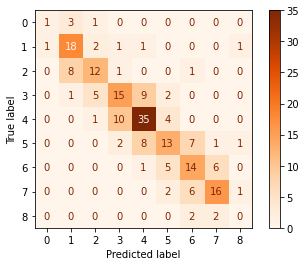

In [28]:
y_pred = gs.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_clf, y_pred)

from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(
        cm,
        display_labels=y_cod.unique()
        )

cmd.plot(cmap='Oranges')

Como estamos sobre valores del 50%, tenemos muchos valores fuera de la diagonal principal.

## Conclusión

Como hemos visto, los estimadores de Regresión para estos datos tienen un mejor desempeño que los estimadores de Clasificación.<br>
Hemos obtenido para varios de ellos valores de estimación por encima del 80%, por lo que podemos considerar que tenemos buenos modelos sobre los que poder hacer predicciones.